<a href="https://colab.research.google.com/github/sanglee/KIBME2019/blob/master/2_Practice_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning & AI: Practice 1

-----------


<br><br>

<h3><div style="text-align: center"> 한양대학교 에리카, AI Lab <br><br>
이상근 </div> </h3>


## Prepare Digits Data Set

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

(1797, 64)


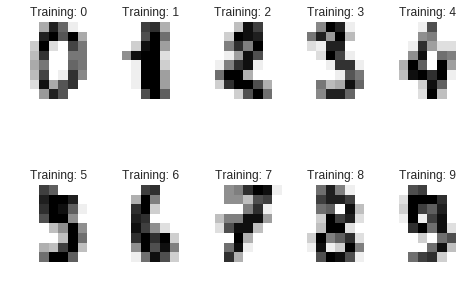

In [13]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

## Train & Test Split

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=0)

## Standardization

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train) # not on the test set
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Classification with Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.1, random_state=0, solver='lbfgs', multi_class='auto')
lr.fit(X_train_std, y_train)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_train_std)
print('Train-set Accuracy: %.2f' % accuracy_score(y_train, y_pred))
y_pred = lr.predict(X_test_std)
print('Test-set Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Train-set Accuracy: 0.99
Test-set Accuracy: 0.96


In [22]:
from sklearn import metrics

print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  1  0  2  1]
 [ 0  2 50  0  0  0  0  1  0  0]
 [ 0  0  0 52  0  0  0  0  2  0]
 [ 0  0  0  0 46  0  0  2  0  0]
 [ 0  0  0  0  0 54  1  0  0  2]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  0  0  0  2  0  0 51  0  0]
 [ 0  3  1  0  0  0  0  0 56  1]
 [ 0  0  0  0  0  1  0  1  0 55]]


## Classification with SVM

In [30]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=0, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [31]:
y_pred = svm.predict(X_train_std)
print('Train-set Accuracy: %.2f' % accuracy_score(y_train, y_pred))
y_pred = svm.predict(X_test_std)
print('Test-set Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Train-set Accuracy: 1.00
Test-set Accuracy: 0.97


In [32]:
from sklearn import metrics

print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  0  0  0  1  0]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  0  0  0  1  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0  1]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  0  0  0  2  0  0 50  0  1]
 [ 0  3  0  2  0  0  0  0 55  1]
 [ 0  0  0  1  0  1  0  0  0 55]]


## PCA Analysis

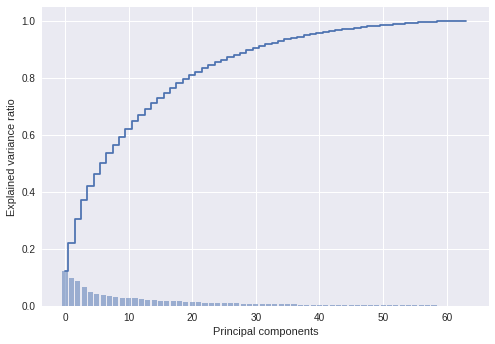

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

vals = pca.explained_variance_ratio_[:]

plt.bar(range(0, vals.size), vals, alpha=0.5, align='center')
plt.step(range(0, vals.size), np.cumsum(vals), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

(1257, 10)


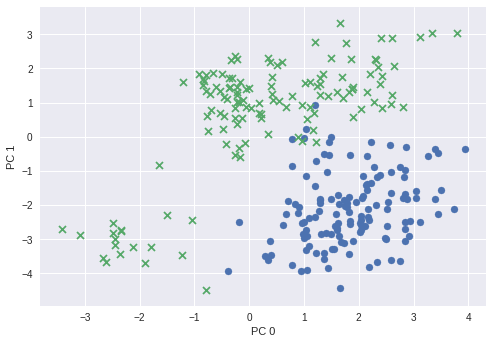

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(X_train_pca.shape)

A = 0
B = 1
PC_x = 0
PC_y = 1
plt.scatter(X_train_pca[y_train==A, PC_x], X_train_pca[y_train==A, PC_y], marker='o')
plt.scatter(X_train_pca[y_train==B, PC_x], X_train_pca[y_train==B, PC_y], marker='x')
plt.xlabel('PC %d' % PC_x)
plt.ylabel('PC %d' % PC_y)
plt.show()
